# Setup

In [260]:
%display latex
var("a b c d x y")

(a, b, c, d, x, y)

In [261]:
golden_ratio = (1 + sqrt(5)) / 2
float(golden_ratio)

1.618033988749895

$$ (a + b\phi)(c + d\phi) = (ac + bd) + (ad + bc + bd)\phi $$

Thus

$$ M(a + b\phi) = \begin{pmatrix} a & b \\ b & a + b \end{pmatrix} $$

In [262]:
def mat(a,b):
    return matrix([[a, b], [b, a + b]])

In [263]:
one = mat(1, 0)
phi = mat(0, 1)

In [264]:
expand(mat(a,b) * mat(c,d))

[              a*c + b*d         b*c + a*d + b*d]
[        b*c + a*d + b*d a*c + b*c + a*d + 2*b*d]

In [265]:
mat(a,b).det()

(a + b)*a - b^2

In [266]:
factor(mat(a,b).inverse() * mat(a,b).det())

[a + b    -b]
[   -b     a]

In [267]:
phi * (phi - one)

[1 0]
[0 1]

In [268]:
def decompose(m):
    return m[0,0], m[1,0]

decompose(mat(a,b))

(a, b)

In [269]:
def conj(m):
    (a, b) = decompose(m)
    return mat(a + b, -b)

In [270]:
def norm(a,b):
    return (a + b) * a - b*b

norm(a,b) == det(mat(a,b))

(a + b)*a - b^2 == (a + b)*a - b^2

# Test

In [271]:
var("m n")
function("F")
assume(m, "integer", n, "integer")
# assume(F, "integervalued")

In [272]:
def pow(k):
    return mat(F(k-1), F(k))

In [273]:
def fibonacci(k):
    a = 1
    b = 0
    while k > -1:
        tmp = a
        a = b
        b = b + tmp
        k -= 1
    return a
    
[fibonacci(k) for k in range(5)]

[0, 1, 1, 2, 3]

In [274]:
%display latex

In [275]:
lhs = (phi^m - m * one) * (one - m * phi^m).inverse()

In [276]:
u,v = decompose(factor((pow(m) - m * one) * (one + n * pow(n))))

In [277]:
expand(u(m=5,n=7) - u(m=7,n=5))

2*F(7)*F(5) + 2*F(6)*F(4) - 36*F(6) + 36*F(4) + 2

In [278]:
2 * fibonacci(7) * fibonacci(5) + 2 * fibonacci(6) * fibonacci(4) - 36 * fibonacci(6) + 36 * fibonacci(4) + 2

0

In [279]:
expand(v(5,7) - v(7,5))

2*F(7)*F(5) + 2*F(6)*F(5) + 2*F(7)*F(4) - 36*F(7) + 36*F(5)

In [280]:
2 * fibonacci(7) * fibonacci(5) + 2 * fibonacci(6) * fibonacci(5) + 2 * fibonacci(7) * fibonacci(4) - 36 * fibonacci(7) + 36 * fibonacci(5)

0

In [281]:
expand(u - u(m=n,n=m))

m*n*F(m - 1) - m*n*F(n - 1) - m*F(m - 1)*F(n - 1) + n*F(m - 1)*F(n - 1) - m*F(m)*F(n) + n*F(m)*F(n) - m + n + F(m - 1) - F(n - 1)

In [282]:
u

-m*n*F(n - 1) + n*F(m - 1)*F(n - 1) + n*F(m)*F(n) - m + F(m - 1)

In [283]:
v

n*F(m)*F(n - 1) - m*n*F(n) + n*F(m - 1)*F(n) + n*F(m)*F(n) + F(m)

In [284]:
pow(n) * pow(m)

[                  F(m - 1)*F(n - 1) + F(m)*F(n)          F(m)*F(n - 1) + (F(m - 1) + F(m))*F(n)]
[         (F(n - 1) + F(n))*F(m) + F(m - 1)*F(n) (F(m - 1) + F(m))*(F(n - 1) + F(n)) + F(m)*F(n)]

In [285]:
pow(n + m)

[           F(m + n - 1)                F(m + n)]
[               F(m + n) F(m + n) + F(m + n - 1)]

In [286]:
def render(m):
    (a,b) = decompose(m)
    return "(" + str(a) + ") + PHI (" + str(b) + ")"

render(conj(mat(a,b)))

'(a + b) + PHI (-b)'

In [287]:
render(one), render(phi)

('(1) + PHI (0)', '(0) + PHI (1)')

In [288]:
mat(a,b)

[    a     b]
[    b a + b]

In [289]:
det(mat(a,b))

(a + b)*a - b^2

# $\phi$-holomorphism / Philomorphism


A philomorphism is a function $f = (u, v): \mathbb{R}^2 \to \mathbb{R}^2$ which has partial derivatives, and satisfies

$$ \partial_1 v = \partial_2 u $$
$$ \partial_2 v = \partial_1 u + \partial_2 u $$

Note that the equation $$ X^2 = 1 + X $$ has more than 2 solutions, for instance

In [290]:
mat(golden_ratio,0), mat(-1-golden_ratio, 0), phi

(
[1/2*sqrt(5) + 1/2                 0]
[                0 1/2*sqrt(5) + 1/2],

[-1/2*sqrt(5) - 3/2                  0]  [0 1]
[                 0 -1/2*sqrt(5) - 3/2], [1 1]
)

In [291]:
(u,v) = decompose(mat(x,y) ^ 2)
display(u,v)
factor(diff(v, y) - (diff(u,x) + diff(u,y))), factor(diff(v, x) - diff(u, y))

x^2 + y^2

(x + y)*y + x*y

(0, 0)

It seems only the monomials $1,x,x^2$ are philomorphic.

In [292]:
expand(det(golden_ratio - phi))

0

# Noninvertible elements

These are elements $a + \phi b$ where $b^2 = (a+b)a$.

In [293]:
det(mat(a,b))

(a + b)*a - b^2

In [294]:
solve(det(mat(a,b)) == 0, a)

[a == -1/2*b*(sqrt(5) + 1), a == 1/2*b*(sqrt(5) - 1)]

Non-invertibles are thus of the form

$$ b(-\phi, 1) \quad\text{or}\quad b((\phi - 1), 1) $$

That is, they lie on one of two perpendicular lines.

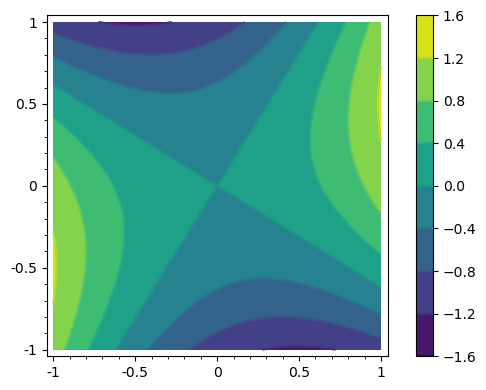

In [295]:
import matplotlib.cm;
contour_plot(det(mat(x,y)), xrange=(-1,1), yrange=(-1,1), cmap=matplotlib.cm.datad.keys(), colorbar=true)

# Back to shaq

In [296]:
U,V = decompose(factor((pow(m) - m) * (1 + m * pow(m)).inverse()))

In [297]:
U

-(m^2*F(m - 1) - m*F(m - 1)^2 + m^2*F(m) - m*F(m - 1)*F(m) + m*F(m)^2 + m - F(m - 1))/(m^2*F(m - 1)^2 + m^2*F(m - 1)*F(m) - m^2*F(m)^2 + 2*m*F(m - 1) + m*F(m) + 1)

In [298]:
V

(m^2 + 1)*F(m)/(m^2*F(m - 1)^2 + m^2*F(m - 1)*F(m) - m^2*F(m)^2 + 2*m*F(m - 1) + m*F(m) + 1)

In [299]:
decompose(pow(m)*pow(m)) , decompose(pow(2*m))

((F(m - 1)^2 + F(m)^2, (F(m - 1) + F(m))*F(m) + F(m - 1)*F(m)),
 (F(2*m - 1), F(2*m)))

In [300]:
decompose(pow(m)*pow(n)) , decompose(pow(n + m))

((F(m - 1)*F(n - 1) + F(m)*F(n), F(m)*F(n - 1) + (F(m - 1) + F(m))*F(n)),
 (F(m + n - 1), F(m + n)))

In [301]:
decompose(pow(m-n)*pow(m+n))[0]

F(m + n)*F(m - n) + F(m + n - 1)*F(m - n - 1)

In [302]:
decompose(pow(m-n)*pow(m+n))[1]

(F(m - n) + F(m - n - 1))*F(m + n) + F(m + n - 1)*F(m - n)

# Cassini identity

In [303]:
det(phi)

-1

In [304]:
det(pow(m))

(F(m - 1) + F(m))*F(m - 1) - F(m)^2

Thus $$ (-1)^m = F_{m+1}F_{m-1} - F_m^2 $$

# Catalan identity

In [315]:
pow(0) + pow(1) + pow(2)

[           F(1) + F(0) + F(-1)             F(2) + F(1) + F(0)]
[            F(2) + F(1) + F(0) F(2) + 2*F(1) + 2*F(0) + F(-1)]

In [318]:
(1 - pow(n+1)) * (1 - phi).inverse()

[             F(n + 1)   F(n + 1) + F(n) - 1]
[  F(n + 1) + F(n) - 1 2*F(n + 1) + F(n) - 1]

# m+n

In [306]:
for term in decompose(pow(m) * pow(n)):
    display(term)

F(m - 1)*F(n - 1) + F(m)*F(n)

F(m)*F(n - 1) + (F(m - 1) + F(m))*F(n)

In [307]:
for term in decompose(pow(m+n)):
    display(term)

F(m + n - 1)

F(m + n)

Thus, for any $m,n$ we have
$$ F_{m+n-1} =  F_{m-1}F_{n-1} + F_m F_n $$
(or the same with an index shift:)
$$ F_{m+n} =  F_{m}F_{n-1} + F_{m+1} F_n $$

# a+b+c

In [308]:
for term in decompose(pow(a) * pow(b) * pow(c)):
    display(expand(term))

F(a - 1)*F(b - 1)*F(c - 1) + F(a)*F(b)*F(c - 1) + F(a)*F(b - 1)*F(c) + F(a - 1)*F(b)*F(c) + F(a)*F(b)*F(c)

F(a)*F(b - 1)*F(c - 1) + F(a - 1)*F(b)*F(c - 1) + F(a)*F(b)*F(c - 1) + F(a - 1)*F(b - 1)*F(c) + F(a)*F(b - 1)*F(c) + F(a - 1)*F(b)*F(c) + 2*F(a)*F(b)*F(c)

In [309]:
for term in decompose(pow(a+b+c)):
    display(expand(term))

F(a + b + c - 1)

F(a + b + c)

In [310]:
expand((F(a)+ F(a-1)) * (F(b)+ F(b-1)) * (F(c)+ F(c-1)) - decompose(pow(a)*pow(b)*pow(c))[1])

F(a - 1)*F(b - 1)*F(c - 1) - F(a)*F(b)*F(c)

Thus

$$ F_{a+b+c} = F_{a+1} F_{b+1} F_{c+1} + F_a F_b F_c - F_{a-1} F_{b-1} F_{c-1} $$

In [335]:
expand(decompose(pow(a)*pow(b)*pow(c))[1])

F(a)*F(b - 1)*F(c - 1) + F(a - 1)*F(b)*F(c - 1) + F(a)*F(b)*F(c - 1) + F(a - 1)*F(b - 1)*F(c) + F(a)*F(b - 1)*F(c) + F(a - 1)*F(b)*F(c) + 2*F(a)*F(b)*F(c)

In [323]:
def test(a,b,c):
    return abs(fibonacci(a+b+c) - (fibonacci(a+1)*fibonacci(b+1)*fibonacci(c+1) + fibonacci(a)*fibonacci(b)*fibonacci(c) - fibonacci(a-1)*fibonacci(b-1)*fibonacci(c-1)))

sum([ test(a,b,c) for a in range(30) for b in range(30) for c in range(30) ])

0

In [320]:
for i in range(10):
    display(fibonacci(i))

0

1

1

2

3

5

8

13

21

34

# Binomial

In [332]:
(1 + phi)^7

[233 377]
[377 610]

In [333]:
phi^14

[233 377]
[377 610]

# Norm 1

There should be two branches, yielding analogues of sine/cosine

In [339]:
solve(det(mat(a,b)) == 1, b)

[b == 1/2*a - 1/2*sqrt(5*a^2 - 4), b == 1/2*a + 1/2*sqrt(5*a^2 - 4)]

verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 89 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: 'math domain error'
verbose 0 (3797: plot.py, generate_plot_points) WARNING: When plotting, failed to evaluate function at 88 points.
verbose 0 (3797: plot.py, generate_plot_points) Last error message: 'math domain error'


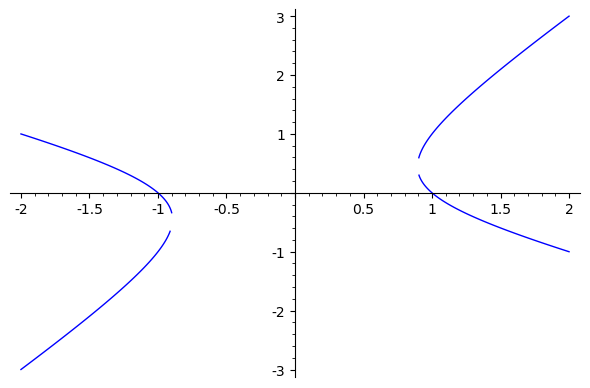

In [347]:
plot((a - sqrt(5*a^2-4))/2, a, -2, 2) + plot((a + sqrt(5*a^2-4))/2, a, -2, 2)

lmao, now find the parametrisation...

In [363]:
expand(det(pow(n+a)*pow(n+b)))

(F(a + n)^2 - F(a + n)*F(a + n - 1) - F(a + n - 1)^2)*(F(b + n)^2 - F(b + n)*F(b + n - 1) - F(b + n - 1)^2)